# **Space Missions – Analyzing Space Mission Data**

**Overview**

This project explores 500 space missions, analyzing their cost, duration, fuel consumption, crew size, and success rates. Using Python, Pandas, and Matplotlib, we uncover insights into the efficiency, challenges, and outcomes of space exploration.


- Mission ID – Unique identifier for each mission.
- Mission Name – Name assigned to the mission.
- Launch Date – Date when the mission was launched.
- Target Type – Category of the mission's target (e.g., Star, Exoplanet, Asteroid).
- Target Name – Specific name of the target (e.g., Titan, Betelgeuse, Mars).
- Mission Type – Purpose of the mission (e.g., Colonization, Exploration, Mining).
- Distance from Earth (light-years) – Distance of the target from Earth.
- Mission Duration (years) – Time taken for the mission.
- Mission Cost (billion USD) – Cost of the mission in billions of dollars.
- Scientific Yield (points) – Measure of the scientific output.
- Crew Size – Number of crew members onboard.
- Mission Success (%) – Success rate of the mission in percentage.
- Fuel Consumption (tons) – Amount of fuel used.
- Payload Weight (tons) – Weight of the payload.
- Launch Vehicle – Name of the vehicle used for launch.





# **Step 1: Load and Explore the Dataset**

---



### **Load Dataset**

In [ ]:
# Import Required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load Dataset through csv
df = pd.read_csv('/content/drive/MyDrive/Dataset/space_missions_dataset.csv')

In [ ]:
# Display first 5 columns of Dataset
df.head()

,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
0,MSN-0001,Mission-1,2025-01-01,Star,Titan,Colonization,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,SLS
1,MSN-0002,Mission-2,2025-01-08,Exoplanet,Betelgeuse,Colonization,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,Starship
2,MSN-0003,Mission-3,2025-01-15,Asteroid,Mars,Exploration,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,Starship
3,MSN-0004,Mission-4,2025-01-22,Exoplanet,Titan,Colonization,26.33,17.8,232.89,36.0,59,90.0,2569.05,40.67,Starship
4,MSN-0005,Mission-5,2025-01-29,Exoplanet,Proxima b,Mining,8.67,9.2,72.14,96.5,31,73.2,892.76,12.40,Starship


### **Check Missing values & Datatypes**

In [ ]:
# Check Datatypes
df.dtypes

,0
Mission ID,object
Mission Name,object
Launch Date,object
Target Type,object
Target Name,object
Mission Type,object
Distance from Earth (light-years),float64
Mission Duration (years),float64
Mission Cost (billion USD),float64
Scientific Yield (points),float64


In [ ]:
# Check Missing values or Null Values
df.isnull().sum()

,0
Mission ID,0
Mission Name,0
Launch Date,0
Target Type,0
Target Name,0
Mission Type,0
Distance from Earth (light-years),0
Mission Duration (years),0
Mission Cost (billion USD),0
Scientific Yield (points),0


In [ ]:
# Check Nan values
df.isna().sum()

,0
Mission ID,0
Mission Name,0
Launch Date,0
Target Type,0
Target Name,0
Mission Type,0
Distance from Earth (light-years),0
Mission Duration (years),0
Mission Cost (billion USD),0
Scientific Yield (points),0


# **Step 2: Data Cleaning & Preprocessing**

In [ ]:
# Overview of dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Mission ID                         500 non-null    object 
 1   Mission Name                       500 non-null    object 
 2   Launch Date                        500 non-null    object 
 3   Target Type                        500 non-null    object 
 4   Target Name                        500 non-null    object 
 5   Mission Type                       500 non-null    object 
 6   Distance from Earth (light-years)  500 non-null    float64
 7   Mission Duration (years)           500 non-null    float64
 8   Mission Cost (billion USD)         500 non-null    float64
 9   Scientific Yield (points)          500 non-null    float64
 10  Crew Size                          500 non-null    int64  
 11  Mission Success (%)                500 non-null    float64

- Launch Date is in Object type have to convert it into Datetime

### **Convert 'Launch Date' to 'datetime'**

In [ ]:
# Change Launch Date column datatype to datetime
df['Launch Date'] = pd.to_datetime(df['Launch Date'])

In [ ]:
# Extract launch year
df['Launch Year'] = df['Launch Date'].dt.year

In [ ]:
# Treat Mission ID as a Categorical Variable
df['Mission ID']= df['Mission ID'].astype("category")

In [ ]:
# Display the changes made in Data types
df.dtypes

,0
Mission ID,category
Mission Name,object
Launch Date,datetime64[ns]
Target Type,object
Target Name,object
Mission Type,object
Distance from Earth (light-years),float64
Mission Duration (years),float64
Mission Cost (billion USD),float64
Scientific Yield (points),float64


# **Step 3: Exploratory Data Analysis (EDA)**

---

## Column Types




* **Numerical Column** -> Distance from Earth (light-years),	Mission Duration (years),	Mission Cost (billion USD),	Scientific Yield (points),	Crew Size, Mission Success (%),	Fuel Consumption (tons),	Payload Weight (tons)

* **Categorical Column** -> Mission ID(Identifier),Mission Name (Unique Identifier),Target Type,	Target Name,	Mission Type, Launch Vehicle

* **Mixed Column** -> 	Launch Date( datetime)

---

## Univariate Analysis on Numerical columns

In [ ]:
# Display the first 5 rows of Dataset
df.head()

,Mission ID,Mission Name,Launch Date,Target Type,Target Name,Mission Type,Distance from Earth (light-years),Mission Duration (years),Mission Cost (billion USD),Scientific Yield (points),Crew Size,Mission Success (%),Fuel Consumption (tons),Payload Weight (tons),Launch Vehicle
0,MSN-0001,Mission-1,2025-01-01,Star,Titan,Colonization,7.05,5.2,526.68,64.3,21,100.0,731.88,99.78,SLS
1,MSN-0002,Mission-2,2025-01-08,Exoplanet,Betelgeuse,Colonization,41.76,23.0,234.08,84.4,72,89.6,4197.41,45.72,Starship
2,MSN-0003,Mission-3,2025-01-15,Asteroid,Mars,Exploration,49.22,28.8,218.68,98.6,16,98.6,4908.00,36.12,Starship
3,MSN-0004,Mission-4,2025-01-22,Exoplanet,Titan,Colonization,26.33,17.8,232.89,36.0,59,90.0,2569.05,40.67,Starship
4,MSN-0005,Mission-5,2025-01-29,Exoplanet,Proxima b,Mining,8.67,9.2,72.14,96.5,31,73.2,892.76,12.40,Starship


In [ ]:
# Dimension of the Dataset
df.shape

(500, 15)

In [ ]:
# Display Column names of dataset
df.columns

Index(['Mission ID', 'Mission Name', 'Launch Date', 'Target Type',
       'Target Name', 'Mission Type', 'Distance from Earth (light-years)',
       'Mission Duration (years)', 'Mission Cost (billion USD)',
       'Scientific Yield (points)', 'Crew Size', 'Mission Success (%)',
       'Fuel Consumption (tons)', 'Payload Weight (tons)', 'Launch Vehicle'],
      dtype='object')

In [ ]:
# Convert column names to lists
df.columns.to_list()

['Mission ID',
 'Mission Name',
 'Launch Date',
 'Target Type',
 'Target Name',
 'Mission Type',
 'Distance from Earth (light-years)',
 'Mission Duration (years)',
 'Mission Cost (billion USD)',
 'Scientific Yield (points)',
 'Crew Size',
 'Mission Success (%)',
 'Fuel Consumption (tons)',
 'Payload Weight (tons)',
 'Launch Vehicle']

### Distance from Earth (light-years

In [ ]:
# 1. Descriptive Statistics
df['Distance from Earth (light-years)'].describe()

,Distance from Earth (light-years)
count,500.000000
mean,25.483060
std,14.942128
min,0.350000
25%,11.750000
50%,26.185000
75%,38.570000
max,49.900000


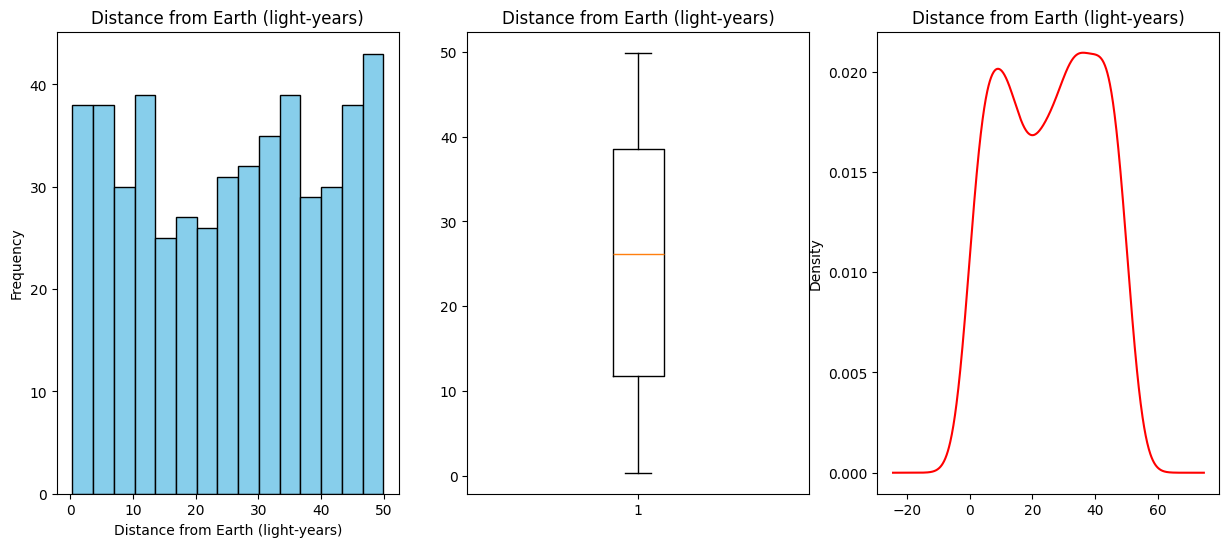

In [ ]:
# 2.Visualizations


plt.figure(figsize=(15, 6))

# Histogram
plt.subplot(1,3, 1)
plt.hist(df['Distance from Earth (light-years)'], bins = 15, color = 'skyblue', edgecolor = 'black')
plt.title('Distance from Earth (light-years)')
plt.xlabel('Distance from Earth (light-years)')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 3, 2)
plt.boxplot(df['Distance from Earth (light-years)'])
plt.title('Distance from Earth (light-years)')

# Density Plot
plt.subplot(1, 3, 3)
df['Distance from Earth (light-years)'].plot(kind = 'kde', color = 'red')
plt.title('Distance from Earth (light-years)')

plt.show()


In [ ]:
# Calculate skewness
df['Distance from Earth (light-years)'].skew()

-0.05397102751966421

## **Conclusion (Distance from Earth (light-years))**

- The data has no major outliers.
- The skewness -0.05 i.e (almost symmetric), so data is not skewed.
- The data has no missing values


### Mission Duration (years)

In [ ]:
# Descriptive Statistics
df['Mission Duration (years)'].describe()

,Mission Duration (years)
count,500.000000
mean,15.736800
std,7.578316
min,1.400000
25%,8.900000
50%,16.400000
75%,22.200000
max,29.500000


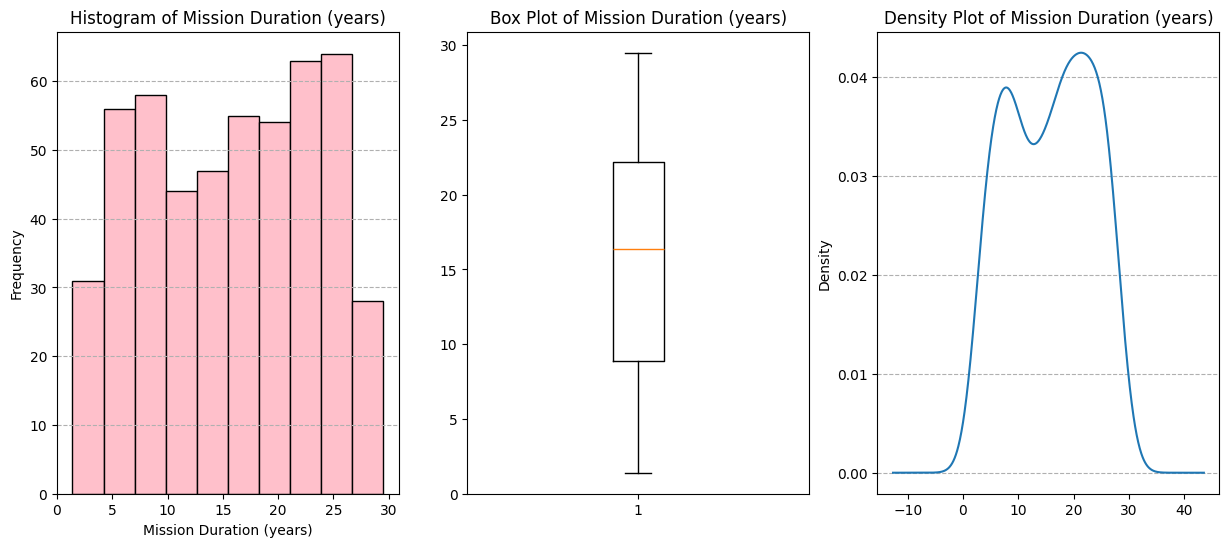

In [ ]:
# Visualization

plt.figure(figsize= (15, 6))

# Histogram
plt.subplot(1,3,1)
plt.hist(df['Mission Duration (years)'], color = 'pink', edgecolor = 'black')
plt.title('Histogram of Mission Duration (years)')
plt.xlabel('Mission Duration (years)')
plt.ylabel('Frequency')
plt.grid(axis = "y", linestyle = "--")

# Box Plot
plt.subplot(1,3,2)
plt.boxplot(df['Mission Duration (years)'])
plt.title('Box Plot of Mission Duration (years)')

# Density Plot
plt.subplot(1,3,3)
df['Mission Duration (years)'].plot(kind = 'density')
plt.title('Density Plot of Mission Duration (years)')
plt.grid(axis = "y", linestyle = "--")

plt.show()

## **Conclusion**

- The average mission duration is 15.74 years, with most missions lasting between 8.9 and 22.2 years.
- The most common mission duration (mode) is 26.6 years.
- The distribution is nearly symmetric (skewness = -0.07), meaning there is no strong bias towards shorter or longer missions.
- The boxplot shows no major outliers, indicating consistent mission durations.

### Mission Cost (billion USD)

In [ ]:
# Descriptive Analysis
df['Mission Cost (billion USD)'].describe()

,Mission Cost (billion USD)
count,500.000000
mean,277.300280
std,141.137422
min,13.320000
25%,149.960000
50%,282.170000
75%,399.995000
max,538.320000


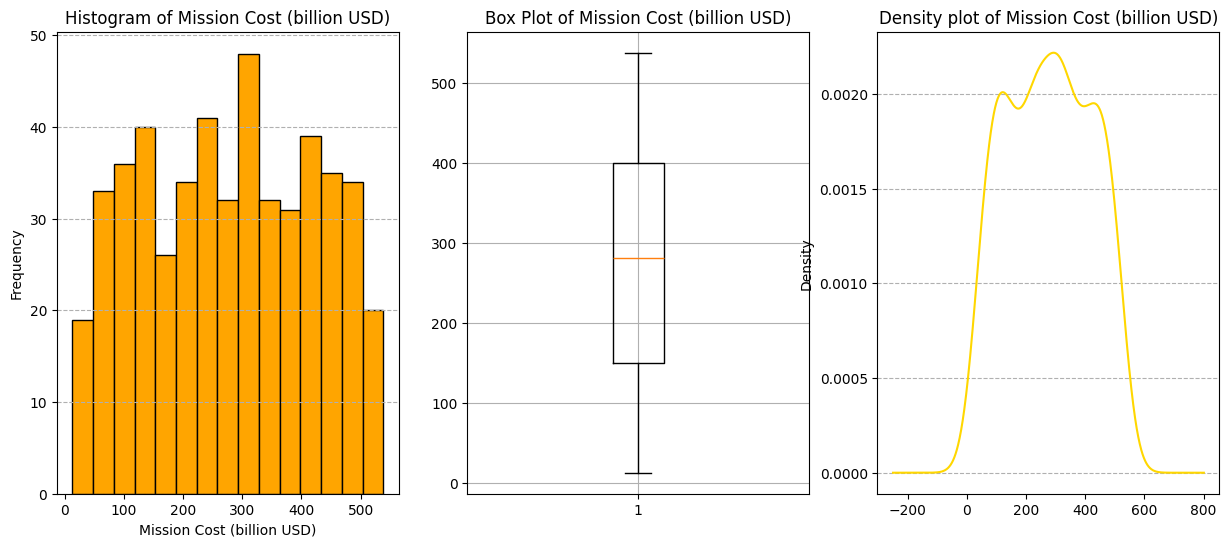

In [ ]:
# Visualization

plt.figure(figsize=(15,6))

# Histogram
plt.subplot(1,3,1)
plt.hist(df['Mission Cost (billion USD)'], bins = 15, color = 'orange', edgecolor = 'black')
plt.title('Histogram of Mission Cost (billion USD)')
plt.grid(axis = "y", linestyle = "--")
plt.xlabel('Mission Cost (billion USD)')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1,3,2)
plt.boxplot(df['Mission Cost (billion USD)'])
plt.title('Box Plot of Mission Cost (billion USD)')
plt.grid(True)

# Density
plt.subplot(1,3,3)
df['Mission Cost (billion USD)'].plot(kind = 'density', color = "gold")
plt.title('Density plot of Mission Cost (billion USD)')
plt.grid(axis = "y", linestyle = "--")
plt.show()

In [ ]:
# Check Skewness
skewness = df['Mission Cost (billion USD)'].skew()
print(f"Skewness: {skewness}")

Skewness: 0.0032672399105891


### Fuel Consumption (tons)

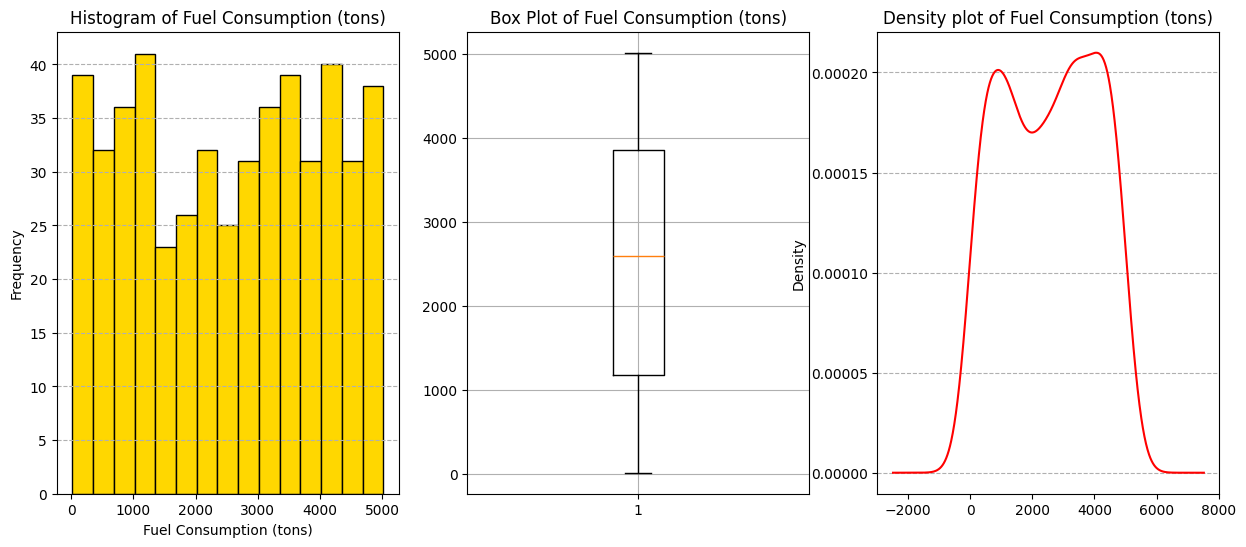

In [ ]:
plt.figure(figsize=(15,6))

# Histogram
plt.subplot(1,3,1)
plt.hist(df['Fuel Consumption (tons)'], bins = 15, color = 'gold', edgecolor = 'black')
plt.title('Histogram of Fuel Consumption (tons)')
plt.grid(axis = "y", linestyle = "--")
plt.xlabel('Fuel Consumption (tons)')
plt.ylabel('Frequency')

# Box Plot
plt.subplot(1,3,2)
plt.boxplot(df['Fuel Consumption (tons)'])
plt.title('Box Plot of Fuel Consumption (tons)')
plt.grid(True)

# Density
plt.subplot(1,3,3)
df['Fuel Consumption (tons)'].plot(kind = 'density', color = "red")
plt.title('Density plot of Fuel Consumption (tons)')
plt.grid(axis = "y", linestyle = "--")

plt.show()

### **Conclusion**



**1. Mission Trends Over Time**

Number of missions launched per year

Growth in mission frequency over time

Trends in mission costs over different periods


In [ ]:
# Find number of Missions per year
missions_per_year = df['Launch Year'].value_counts().sort_index()
print("Count of Missions per year :\n",missions_per_year)

Count of Missions per year :
 Launch Year
2025    53
2026    52
2027    52
2028    52
2029    52
2030    52
2031    53
2032    52
2033    52
2034    30
Name: count, dtype: int64


In [ ]:
# Find average cost of mission per year
avg_cost_per_year = df.groupby('Launch Year')['Mission Cost (billion USD)'].mean()
print('Average cost of mission per year in USD : \n',avg_cost_per_year)

Average cost of mission per year in USD : 
 Launch Year
2025    276.079434
2026    292.349038
2027    232.300385
2028    280.948269
2029    265.944231
2030    273.802692
2031    305.092264
2032    307.717885
2033    268.012115
2034    265.072000
Name: Mission Cost (billion USD), dtype: float64


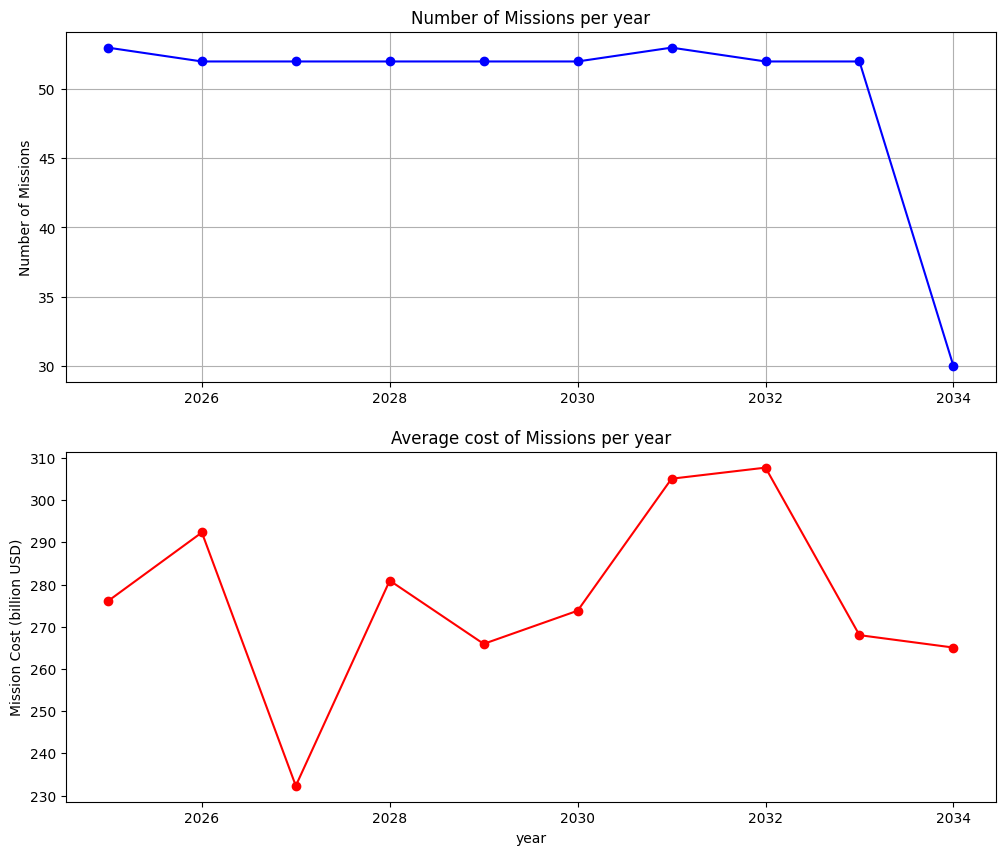

In [ ]:
# Create a figure with two subplots
fig, axes = plt.subplots(2,1, figsize = (12, 10))

# Plot Number of Missions per year
axes[0].plot(missions_per_year.index, missions_per_year.values, marker = "o", linestyle = "-", color = "blue")
axes[0].set_ylabel('Number of Missions')
axes[0].set_title("Number of Missions per year")
axes[0].grid(True)

# Plot Average cost of Missions per year
axes[1].plot(avg_cost_per_year.index, avg_cost_per_year.values, marker = "o", linestyle = "-", color = 'red')
axes[1].set_xlabel("year")
axes[1].set_ylabel("Mission Cost (billion USD)")
axes[1].set_title("Average cost of Missions per year")

plt.show()

In [ ]:
# Display first few rows after transformation
df[['Launch Date', 'Launch Year', 'Mission Cost (billion USD)']].head()

### **Conclusion: Mission Trends Over Time**

1. Number of Missions Per Year:

- The top graph shows how space missions have increased over time.
- Some years had spikes in launches, possibly due to major space programs or new technologies.
- Any drops might be linked to funding issues, failed missions, or policy changes.


2. Average Mission Cost Over Time:

- The bottom graph shows the fluctuations in mission costs over different years.
- Higher costs in some years may indicate complex missions requiring more funding.
- Declining costs could suggest advancements in cost-effective space technology.

**2. Crew Size vs. Mission Outcomes**

We will analyze:

- Relationship between Crew Size and Success Rate
- Crew Size vs. Mission Type (Do larger crews mean better mission success?)

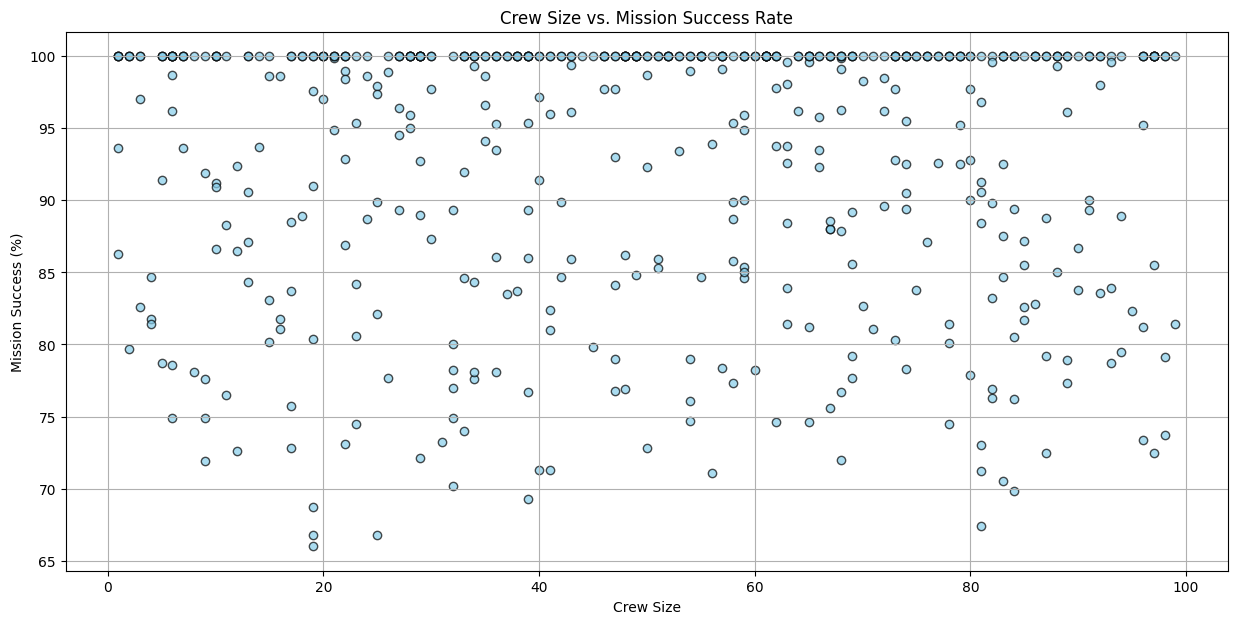

In [ ]:
# Scatter Plot : Crew Size vs. Mission Outcomes
plt.figure(figsize = (15,7))
plt.scatter(df['Crew Size'], df['Mission Success (%)'], alpha = 0.7, color = "skyblue", edgecolor = "k")
plt.xlabel("Crew Size")
plt.ylabel("Mission Success (%)")
plt.title("Crew Size vs. Mission Success Rate")
plt.grid(True)
plt.show()

In [ ]:
# Display basic statistics for Crew Size and Mission Success Rate
print("\nDescriptive Statistics:\n", df[['Crew Size', 'Mission Success (%)']].describe())


Descriptive Statistics:
         Crew Size  Mission Success (%)
count  500.000000           500.000000
mean    50.118000            92.616600
std     27.660989             9.391094
min      1.000000            66.000000
25%     27.000000            85.500000
50%     50.000000            98.600000
75%     74.000000           100.000000
max     99.000000           100.000000


### **Conclusion**
- The scatter plot shows that larger crew sizes generally have high success rates, but even smaller crews achieve high success.
- Most missions have a success rate above 85%, regardless of crew size.
- Some lower success rate missions exist with smaller crews, possibly indicating riskier missions

**3.  Target Type and Mission Purpose**

What We'll Analyze:

- Which celestial bodies (targets) are the most explored?(Mars, Moon, Asteroids, etc.).
- What are the most common mission purposes for each target?(Exploration, Mining, Scientific Research, etc.).

In [ ]:
# Count the number of Missions per target type
missions_per_target = df['Target Type'].value_counts()
print("Count of missions per target type: ", missions_per_target)

Count of missions per target type:  Target Type
Star         112
Planet       109
Moon          95
Exoplanet     93
Asteroid      91
Name: count, dtype: int64


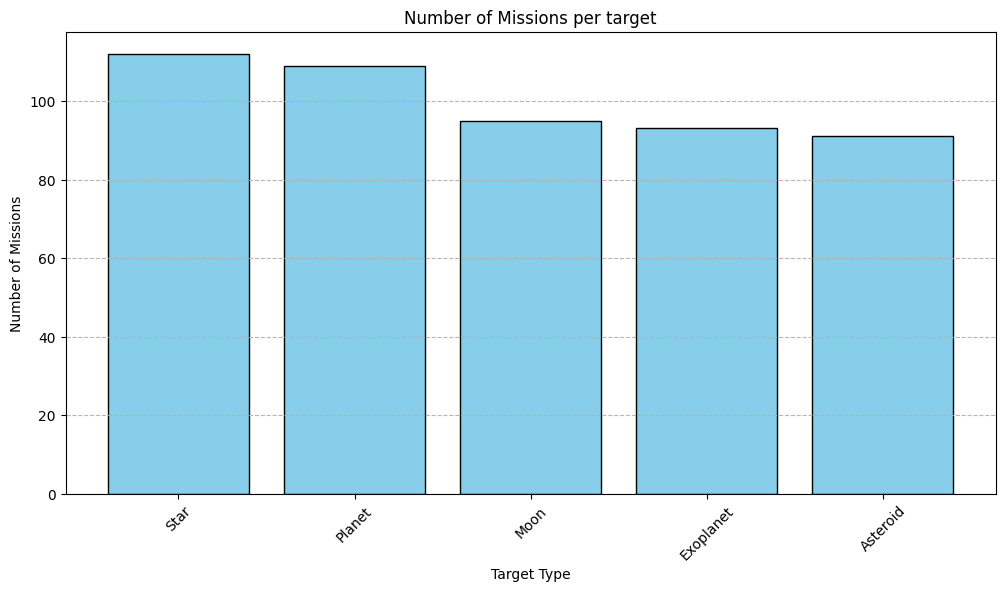

In [ ]:
# Barchart : Number of Missions per Target Type
plt.figure(figsize = (12,6))
plt.bar(missions_per_target.index, missions_per_target.values, color = "skyblue", edgecolor = "Black" )
plt.xlabel("Target Type")
plt.ylabel("Number of Missions")
plt.title("Number of Missions per target")
plt.grid(axis = 'y', linestyle = "--", alpha = 0.9)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Count the number of mission purpose per target type
missions_purpose_per_target = df.groupby('Target Type')['Mission Type'].value_counts().unstack()
print(missions_purpose_per_target)

Mission Type  Colonization  Exploration  Mining  Research
Target Type                                              
Asteroid                18           25      23        25
Exoplanet               22           27      20        24
Moon                    25           20      26        24
Planet                  30           30      23        26
Star                    30           25      24        33


The **unstack()** function in Pandas is used to convert a **multi-indexed Series** into a **DataFrame** by moving one of the index levels into columns. It is often used when you have **grouped data** and need it in a more structured format.

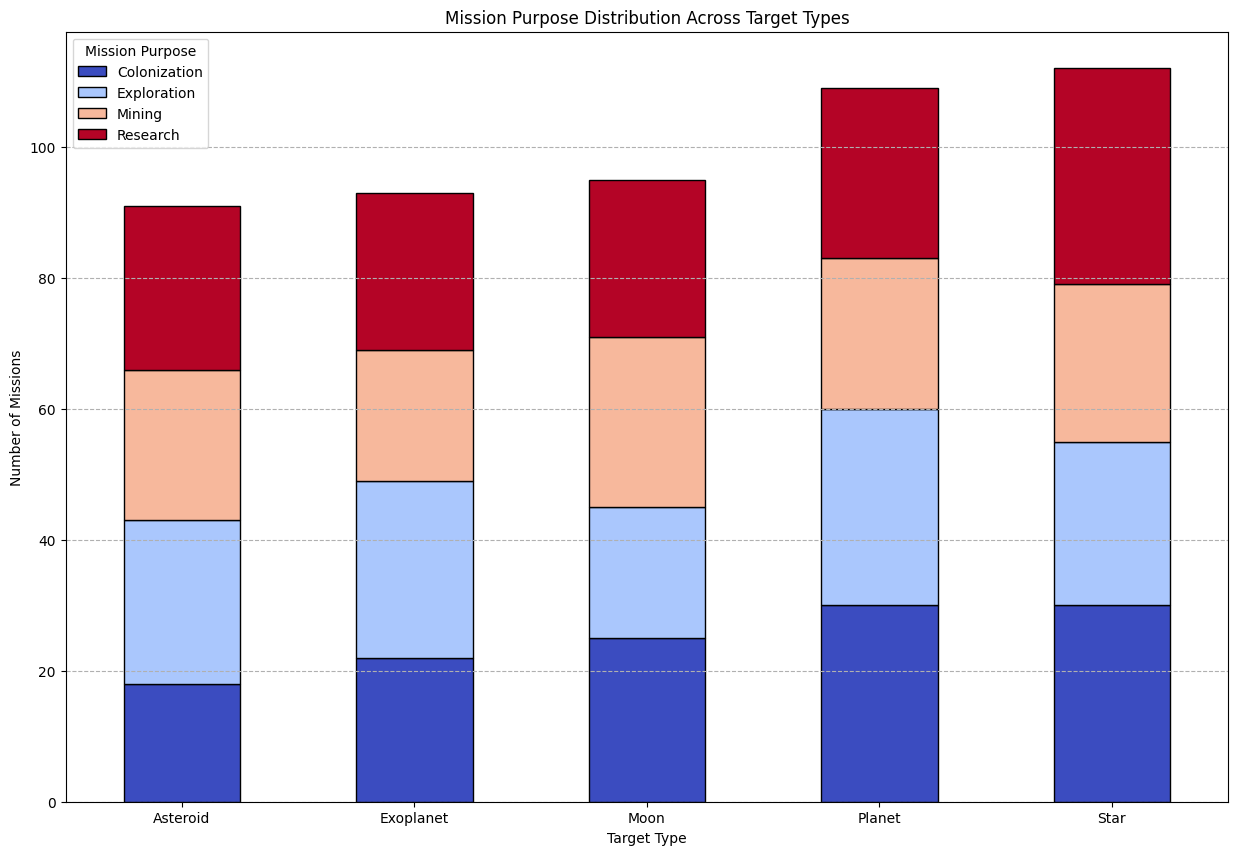

In [ ]:
# Plot stacked bar chart
missions_purpose_per_target.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='coolwarm', edgecolor="black")

# Labels and title
plt.xlabel("Target Type")
plt.ylabel("Number of Missions")
plt.title("Mission Purpose Distribution Across Target Types")
plt.xticks(rotation=360)
plt.legend(title="Mission Purpose", loc="upper left")
plt.grid(axis="y", linestyle="--")

# Show plot
plt.show()

**4. Cost Efficiency of Missions**


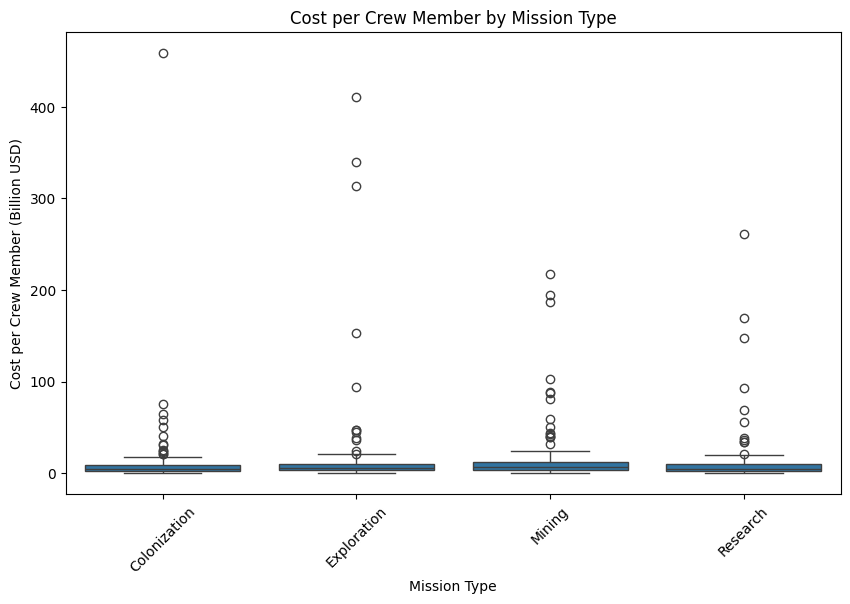

In [ ]:
#Creating a new feature: Cost per Crew Member
df['Cost per Crew Member (Billion USD)'] = df['Mission Cost (billion USD)'] / df['Crew Size']

# Plot cost efficiency
plt.figure(figsize=(10,6))
sns.boxplot(x='Mission Type', y='Cost per Crew Member (Billion USD)', data=df)
plt.xticks(rotation=45)
plt.title("Cost per Crew Member by Mission Type")
plt.show()


**Conclusion**

- Outliers appear as dots outside the whiskers.
- Missions at the upper extreme (above the whiskers) had very high costs per crew member.

**5. Success Rate vs. Mission Type**

- This compares mission success rates across different mission types.

In [ ]:
# Grouping the data by 'Mission Type' and calculating the mean(Average) success percentage
mission_types = df.groupby('Mission Type')['Mission Success (%)'].mean()
print(mission_types)

Mission Type
Colonization    92.525600
Exploration     92.889764
Mining          93.512931
Research        91.652273
Name: Mission Success (%), dtype: float64


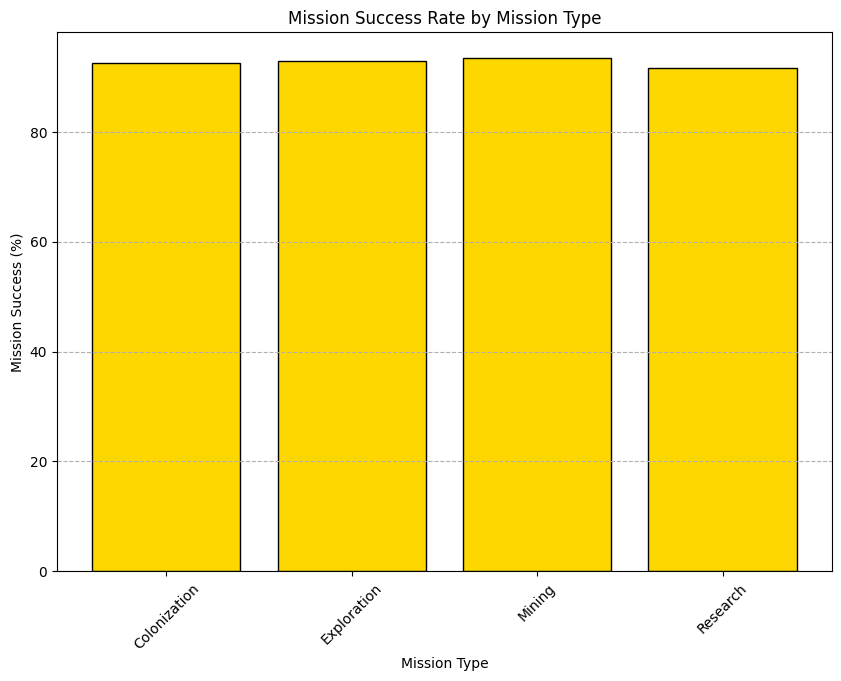

In [ ]:
# Bar Plot :Success Rate vs. Mission Type

plt.figure(figsize=(10, 7))
plt.bar(mission_types.index,mission_types.values, color="Gold", edgecolor = "black")

plt.xticks(rotation=45)
plt.title("Mission Success Rate by Mission Type")
plt.ylabel("Mission Success (%)")
plt.xlabel("Mission Type")
plt.grid(axis = "y", linestyle = "--" )

plt.show()


## Univariate Analysis on Categorical columns



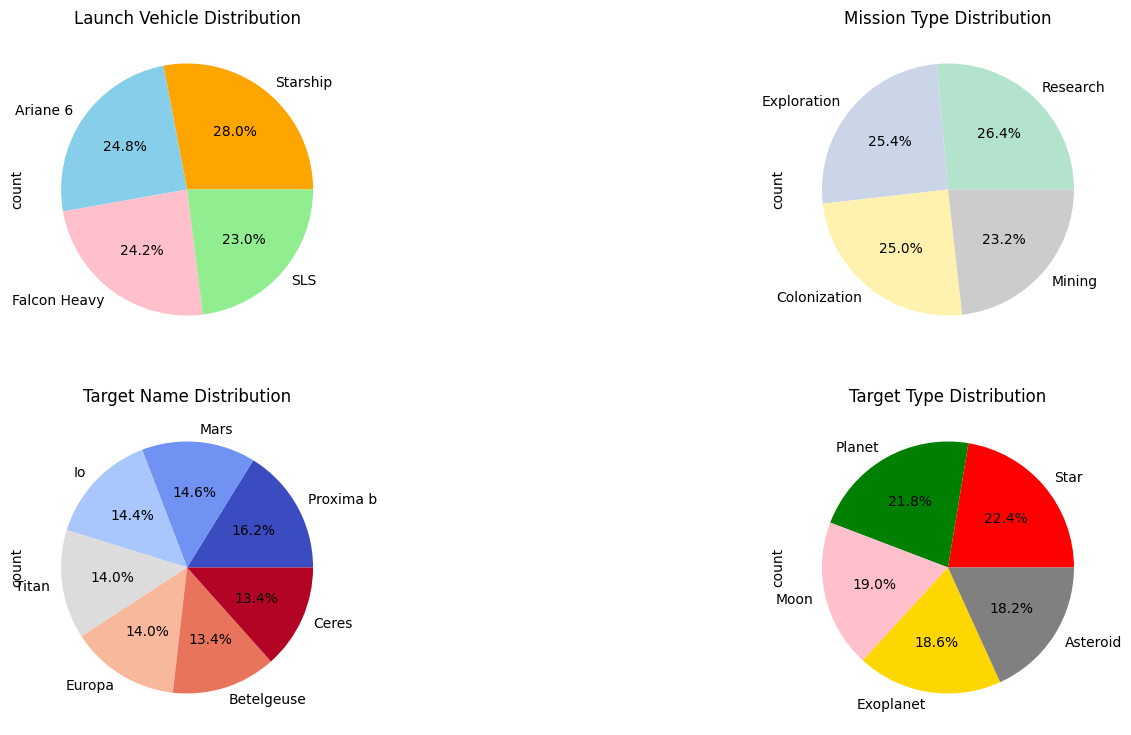

In [ ]:
plt.figure(figsize= (18, 9))

# Launch Vehicle Distribution
plt.subplot(2,2,1)
df['Launch Vehicle'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = ["Orange", "Skyblue", "Pink", "Lightgreen"])
plt.title("Launch Vehicle Distribution")

# Mission Type Distribution
plt.subplot(2,2,2)
df['Mission Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap = "Pastel2")
plt.title("Mission Type Distribution")

# Target Name Distribution
plt.subplot(2,2,3)
df['Target Name'].value_counts().plot(kind='pie', autopct='%1.1f%%', colormap = "coolwarm")
plt.title("Target Name Distribution")

# Target Type Distribution
plt.subplot(2,2,4)
df['Target Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors = ["Red", "Green", "pink", "gold", "Grey"])
plt.title("Target Type Distribution")

plt.show()

